<a href="https://colab.research.google.com/github/subhamNRchoudhary/All-Google-Colab/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]



In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()



In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))




In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)




Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6476 - accuracy: 0.6197 - val_loss: 0.5592 - val_accuracy: 0.7671
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5178 - accuracy: 0.7914 - val_loss: 0.4992 - val_accuracy: 0.7929
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4802 - accuracy: 0.7955 - val_loss: 0.4766 - val_accuracy: 0.7936
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4618 - accuracy: 0.7964 - val_loss: 0.4630 - val_accuracy: 0.7929
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4491 - accuracy: 0.7975 - val_loss: 0.4543 - val_accuracy: 0.7929
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4407 - accuracy: 0.7992 - val_loss: 0.4486 - val_accuracy: 0.7933
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.7998 - val_loss: 0.4442 - val_accuracy: 0.7936

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


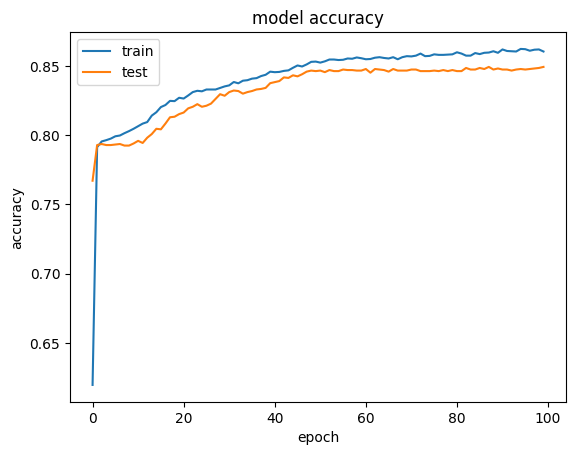

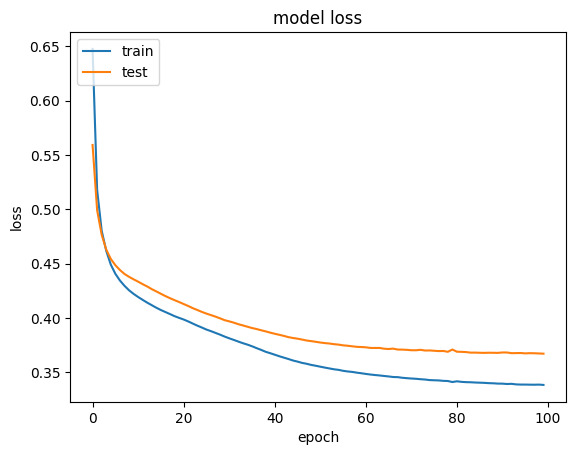

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(cm)
print(score)

63/63 [==============================] - 0s 4ms/step
[[1519   76]
 [ 209  196]]
0.8575


Epoch 1/50
20/20 [==============================] - 3s 13ms/step - loss: 3.9510 - accuracy: 0.5094 - val_loss: 4.1302 - val_accuracy: 0.5125
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 3.7402 - accuracy: 0.5078 - val_loss: 3.9618 - val_accuracy: 0.5125
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 3.5737 - accuracy: 0.5063 - val_loss: 3.8577 - val_accuracy: 0.5125
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 3.4647 - accuracy: 0.5047 - val_loss: 3.7336 - val_accuracy: 0.5125
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 3.2294 - accuracy: 0.5094 - val_loss: 3.4740 - val_accuracy: 0.5125
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 3.0751 - accuracy: 0.5094 - val_loss: 3.3259 - val_accuracy: 0.5188
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 3.0207 - accuracy: 0.5109 - val_loss: 3.2525 - val_accuracy: 0.5188
Epoch 8/50
20/20 [=

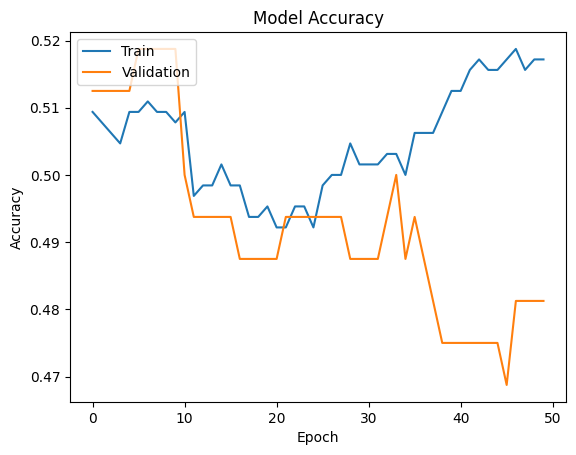

In [ ]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Generating sample data
np.random.seed(0)
X = np.random.rand(1000, 10)  # 1000 samples with 10 features
y = np.random.randint(2, size=(1000,))  # Binary labels (0 or 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN model with Sigmoid activation
model = Sequential()
model.add(Dense(units=6, activation='sigmoid', input_dim=10))  # Input layer with 10 features
model.add(Dense(units=6, activation='sigmoid'))  # Hidden layer with Sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with Sigmoid activation

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model to the training data
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plotting the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/50
20/20 [==============================] - 2s 19ms/step - loss: 0.7629 - accuracy: 0.4906 - val_loss: 0.7668 - val_accuracy: 0.4938
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7485 - accuracy: 0.4891 - val_loss: 0.7549 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.7377 - accuracy: 0.4953 - val_loss: 0.7457 - val_accuracy: 0.5063
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.7297 - accuracy: 0.4938 - val_loss: 0.7374 - val_accuracy: 0.5063
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 0.7231 - accuracy: 0.4922 - val_loss: 0.7309 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 0s 11ms/step - loss: 0.7178 - accuracy: 0.5000 - val_loss: 0.7253 - val_accuracy: 0.4875
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7138 - accuracy: 0.5031 - val_loss: 0.7211 - val_accuracy: 0.4938
Epoch 8/50
20/20 

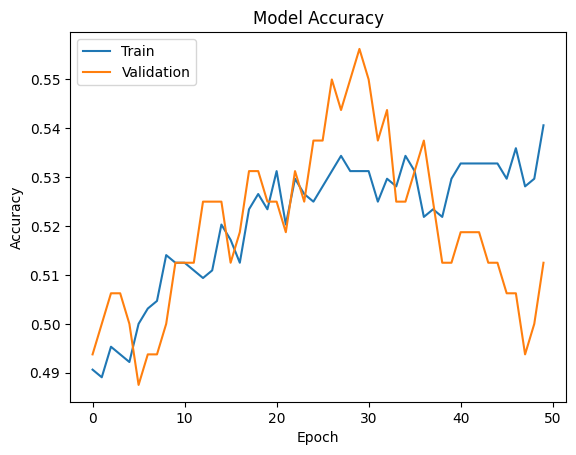

In [ ]:
import tensorflow as tf

# Enable eager execution (not needed in TensorFlow 2.x)
# tf.compat.v1.enable_eager_execution()

# TensorFlow operations can be executed immediately
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])
result = x + y

print("Result:", result.numpy())